In [90]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [229]:
def reader(sampler,error,max_n=1):
    path='/mnt/store1/oliverphilcox/ChempyMultiData/TNG_Abun/MockResults/%s_%dpc'%(sampler,error)
    for i in range(1,max_n+1):
        datfile=np.load(path+'_%d.npz'%i)
        if i==1:
            all_n=datfile.f.n_stars
            percs1,percs2=[np.zeros([len(all_n),3]) for _ in range(2)]
            times=np.zeros(len(all_n))
        dat=datfile.f.Lambdas
        for j in range(len(all_n)):
            percs1[j,:]+=np.percentile(dat[j,:,0],[15.865,50.,84.135])
            percs2[j,:]+=np.percentile(dat[j,:,1],[15.865,50.,84.135])
        times+=datfile.f.runtimes
    percs1/=max_n
    percs2/=max_n
    times/=max_n
    return all_n,percs1,percs2,times
FS=16

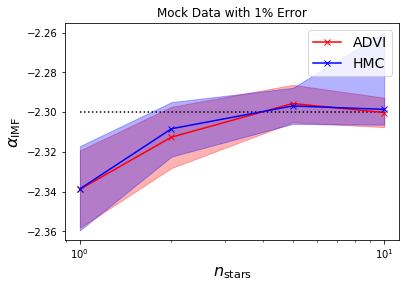

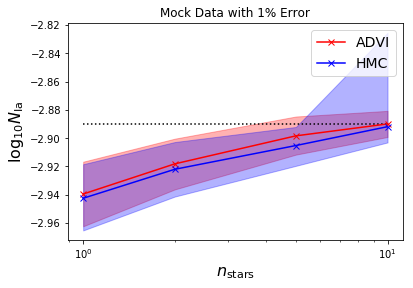

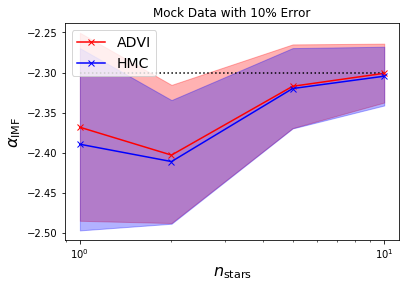

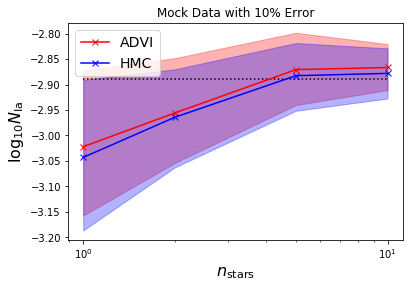

In [230]:
for error in [1,10]:
    ad=reader('ADVI',error)
    hmc=reader('HMC',error)
    labels=[r'$\alpha_\mathrm{IMF}$',r'$\log_{10}N_\mathrm{Ia}$']
    for ind in [0,1]:
        plt.figure()
        plt.fill_between(ad[0],ad[ind+1][:,0],ad[ind+1][:,2],alpha=0.3,color='r')
        plt.errorbar(ad[0],ad[ind+1][:,1],marker='x',label='ADVI',c='r');
        plt.hlines(true[ind],min(ad[0]),max(ad[0]),linestyles=':')
        plt.fill_between(hmc[0],hmc[ind+1][:,0],hmc[ind+1][:,2],alpha=0.3,color='b')
        plt.errorbar(hmc[0],hmc[ind+1][:,1],marker='x',label='HMC',c='b')    
        plt.legend(fontsize=FS-2)
        plt.ylabel(labels[ind],fontsize=FS)
        plt.xlabel(r'$n_\mathrm{stars}$',fontsize=FS)
        plt.xscale('log');
        plt.title('Mock Data with %d%% Error'%error)

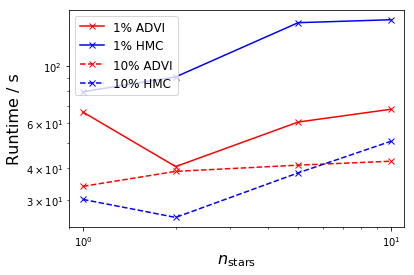

In [231]:
ad=reader('ADVI',1)
hmc=reader('HMC',1)
plt.errorbar(ad[0],ad[3],label='1% ADVI',marker='x',c='r')
plt.errorbar(hmc[0],hmc[3],label='1% HMC',marker='x',c='b')
plt.yscale('log');plt.xscale('log');plt.xlim([0.9*min(ad[0]),1.1*max(ad[0])])
ad=reader('ADVI',10)
hmc=reader('HMC',10)
plt.errorbar(ad[0],ad[3],label='10% ADVI',marker='x',c='r',ls='--')
plt.errorbar(hmc[0],hmc[3],label='10% HMC',marker='x',c='b',ls='--')
plt.yscale('log');plt.xscale('log');plt.xlim([0.9*min(ad[0]),1.1*max(ad[0])])
plt.legend(fontsize=FS-4,loc='upper left');plt.ylabel('Runtime / s',fontsize=FS);plt.xlabel(r'$n_\mathrm{stars}$',fontsize=FS);

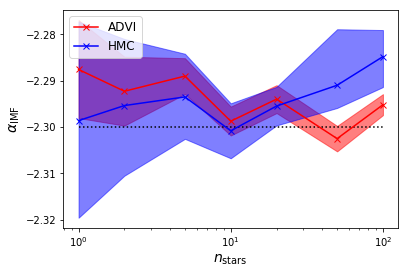

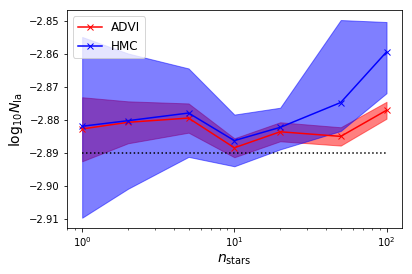

In [109]:
labels=[r'$\alpha_\mathrm{IMF}$',r'$\log_{10}N_\mathrm{Ia}$']
for ind in [0,1]:
    plt.figure()
    pas=[]
    for dat in [d1a1,d1a2,d1a3]:
        pas.append(percs(dat,ind))
    pa=np.mean(np.asarray(pas),axis=0)
    plt.fill_between(pa[0],pa[2],pa[3],alpha=0.5,color='r')
    plt.errorbar(pa[0],pa[1],marker='x',label='ADVI',c='r');
    plt.hlines(true[ind],min(p1a[0]),max(p1a[0]),linestyles=':')
    ph=percs(d1h,ind)
    plt.fill_between(ph[0],ph[2],ph[3],alpha=0.5,color='b')
    plt.errorbar(ph[0],ph[1],marker='x',label='HMC',c='b')    
    plt.legend(fontsize=FS-2)
    plt.ylabel(labels[ind],fontsize=FS)
    plt.xlabel(r'$n_\mathrm{stars}$',fontsize=FS)
    plt.xscale('log');

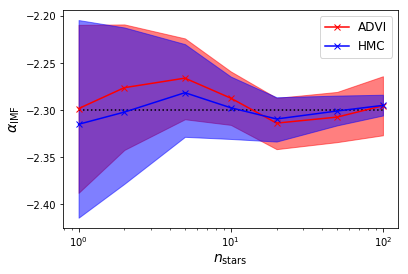

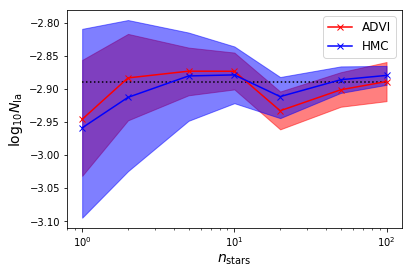

In [97]:
labels=[r'$\alpha_\mathrm{IMF}$',r'$\log_{10}N_\mathrm{Ia}$']

for ind in [0,1]:
    plt.figure()
    pa=percs(d10a,ind)
    plt.fill_between(pa[0],pa[2],pa[3],alpha=0.5,color='r')
    plt.errorbar(pa[0],pa[1],marker='x',label='ADVI',c='r');
    plt.hlines(true[ind],min(p1a[0]),max(p1a[0]),linestyles=':')
    ph=percs(d10h,ind)
    plt.fill_between(ph[0],ph[2],ph[3],alpha=0.5,color='b')
    plt.errorbar(ph[0],ph[1],marker='x',label='HMC',c='b')    
    plt.legend(fontsize=FS-2)
    plt.ylabel(labels[ind],fontsize=FS)
    plt.xlabel(r'$n_\mathrm{stars}$',fontsize=FS)
    plt.xscale('log');

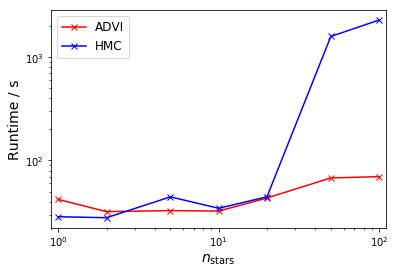

In [116]:
pa1s=[]
for dat in [d1a1,d1a2,d1a3]:
    pa1s.append(percs(dat,0))
pa1=np.mean(np.asarray(pa1s),axis=0)
pa10=percs(d10a,0)
ph1=percs(d1h,0)
ph10=percs(d10h,0)
plt.errorbar(pa[0],np.mean([pa1[4],pa10[4]],axis=0),label='ADVI',marker='x',c='r')
plt.errorbar(ph[0],np.mean([ph1[4],ph10[4]],axis=0),label='HMC',marker='x',c='b')
plt.yscale('log');plt.xscale('log');plt.xlim([0.9*min(pa[0]),1.1*max(pa[0])])
plt.legend(fontsize=FS-2);plt.ylabel('Runtime / s',fontsize=FS);plt.xlabel(r'$n_\mathrm{stars}$',fontsize=FS);